## Data Science Capstone Project : Moving to a New City

The aim here is to locate some safer neighborhoods in a city and find out about kinds of venues it has in its neighborhoods.
I have chosen Chicago for our analysis. 
To identify safer community areas in Chicago, I will be using Chicago crime dataset available on Chicago Data Portal and for community areas and Neighborhoods information, I am referring to Wikipedia information.

In [3]:
import pandas as pd

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
#Chicago crime dataset 
filename = '/Users/yogeshdhome/Desktop/Coursera Notebooks/DataScience Capstone Projects /Final Project/Datasets/ChicagoCrimes.csv'

In [5]:
df = pd.read_csv(filename)

In [6]:
df.shape

(852452, 22)

In [7]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11229647,JB149382,04/01/2017 12:01:00 AM,020XX W TOUHY AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,49.0,1.0,02,NaN,NaN,2017,04/16/2020 03:45:11 PM,NaN,NaN,NaN
1,11059774,JA397187,08/19/2017 12:46:00 AM,012XX N CAMPBELL AVE,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,...,26.0,24.0,04B,1159516.0,1908099.0,2017,04/16/2020 03:45:11 PM,41.903544,-87.689502,"(41.903543909, -87.689502012)"
2,12029970,JD208530,10/01/2017 10:30:00 PM,091XX S HOYNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,STREET,False,False,...,19.0,72.0,02,NaN,NaN,2017,04/15/2020 03:50:26 PM,NaN,NaN,NaN
3,12030218,JD208884,06/30/2017 12:20:00 AM,072XX S EAST END AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,7.0,43.0,11,NaN,NaN,2017,04/15/2020 03:50:26 PM,NaN,NaN,NaN
4,12029991,JD208723,07/06/2017 12:00:00 AM,030XX S TRIPP AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,22.0,30.0,17,NaN,NaN,2017,04/15/2020 03:50:26 PM,NaN,NaN,NaN


### Remove NaN values from dataset

In [8]:
df.dropna(inplace = True)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,11059774,JA397187,08/19/2017 12:46:00 AM,012XX N CAMPBELL AVE,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,...,26.0,24.0,04B,1159516.0,1908099.0,2017,04/16/2020 03:45:11 PM,41.903544,-87.689502,"(41.903543909, -87.689502012)"
5,11186672,JA561393,12/24/2017 12:56:00 AM,058XX S DR MARTIN LUTHER KING JR DR,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,20.0,40.0,04B,1179919.0,1866481.0,2017,04/15/2020 03:48:26 PM,41.788897,-87.615835,"(41.788896709, -87.615835136)"
6,11170596,JA539448,12/06/2017 06:51:00 PM,002XX N HOMAN AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,28.0,27.0,04B,1153678.0,1901317.0,2017,04/15/2020 03:48:26 PM,41.885052,-87.711127,"(41.885051676, -87.711127043)"
7,11003126,JA331135,07/02/2017 04:45:00 AM,051XX W MADISON ST,041A,BATTERY,AGGRAVATED - HANDGUN,GAS STATION,False,False,...,28.0,25.0,04B,1142285.0,1899542.0,2017,04/15/2020 03:48:26 PM,41.880400,-87.753009,"(41.880399914, -87.753008553)"
8,10889351,JA199574,03/25/2017 02:25:00 AM,031XX W FIFTH AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,BAR OR TAVERN,False,False,...,28.0,27.0,04A,1155285.0,1898969.0,2017,04/15/2020 03:48:26 PM,41.878576,-87.705289,"(41.878576405, -87.705288946)"


In [9]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

### Change datatype to integer for community area and ward columns

In [10]:
df['Community Area']=df['Community Area'].astype(int)
df['Ward']=df['Ward'].astype(int)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,11059774,JA397187,08/19/2017 12:46:00 AM,012XX N CAMPBELL AVE,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,...,26,24,04B,1159516.0,1908099.0,2017,04/16/2020 03:45:11 PM,41.903544,-87.689502,"(41.903543909, -87.689502012)"
5,11186672,JA561393,12/24/2017 12:56:00 AM,058XX S DR MARTIN LUTHER KING JR DR,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,20,40,04B,1179919.0,1866481.0,2017,04/15/2020 03:48:26 PM,41.788897,-87.615835,"(41.788896709, -87.615835136)"
6,11170596,JA539448,12/06/2017 06:51:00 PM,002XX N HOMAN AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,28,27,04B,1153678.0,1901317.0,2017,04/15/2020 03:48:26 PM,41.885052,-87.711127,"(41.885051676, -87.711127043)"
7,11003126,JA331135,07/02/2017 04:45:00 AM,051XX W MADISON ST,041A,BATTERY,AGGRAVATED - HANDGUN,GAS STATION,False,False,...,28,25,04B,1142285.0,1899542.0,2017,04/15/2020 03:48:26 PM,41.880400,-87.753009,"(41.880399914, -87.753008553)"
8,10889351,JA199574,03/25/2017 02:25:00 AM,031XX W FIFTH AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,BAR OR TAVERN,False,False,...,28,27,04A,1155285.0,1898969.0,2017,04/15/2020 03:48:26 PM,41.878576,-87.705289,"(41.878576405, -87.705288946)"


### Group community areas by number of crimes in ascending order

In [11]:
df.groupby('Community Area').count()['ID'].sort_values().head(15)


Community Area
9      829
47    1208
12    1588
74    1700
18    1881
55    1899
36    2055
57    2617
37    2801
72    2875
13    2913
64    2945
59    2948
62    3104
34    3248
Name: ID, dtype: int64

In [12]:
#store safer community codes 
df_sorted = df.groupby('Community Area').count()['ID'].sort_values().head(15)
df_sorted

Community Area
9      829
47    1208
12    1588
74    1700
18    1881
55    1899
36    2055
57    2617
37    2801
72    2875
13    2913
64    2945
59    2948
62    3104
34    3248
Name: ID, dtype: int64

### Store the list of safer community codes

In [13]:
df_sorted_fm = df_sorted.to_frame()
df_sorted_fm.reset_index(inplace=True)
df_sorted_fm['Community Area']
safer_comm_codes = df_sorted_fm['Community Area'].to_list()
safer_comm_codes #list of safer community codes

[9, 47, 12, 74, 18, 55, 36, 57, 37, 72, 13, 64, 59, 62, 34]

### Number of crimes for each crime type

In [14]:
df_crime_types=df.groupby('Primary Type').count()['ID']
df_crime_types.head()

Primary Type
ARSON                                  1278
ASSAULT                               64867
BATTERY                              159701
BURGLARY                              36292
CONCEALED CARRY LICENSE VIOLATION       473
Name: ID, dtype: int64

### Plot the types of crimes vs Number of crimes

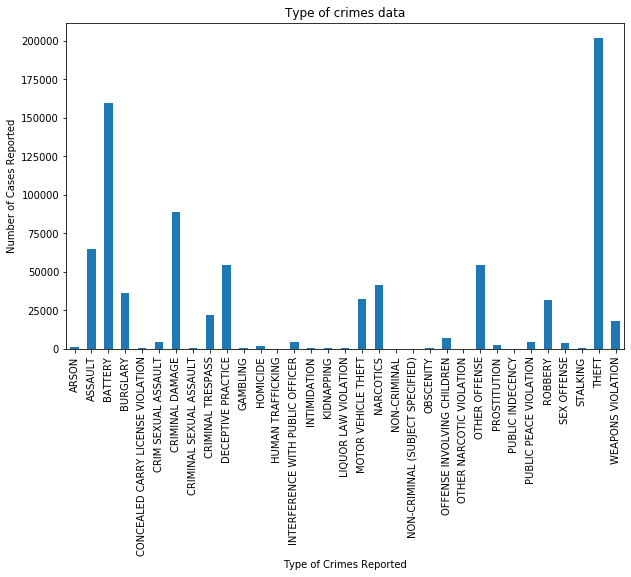

In [15]:
df_crime_types.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Type of Crimes Reported') # add to x-label to the plot
plt.ylabel('Number of Cases Reported') # add y-label to the plot
plt.title('Type of crimes data') # add title to the plot

plt.show()

### Top 5 types of crime cases reported 

In [16]:
df_top5crimes=df.groupby('Primary Type').count()['ID'].sort_values(ascending=False).head(5)
top5crime_list = df_top5crimes.to_frame().reset_index()['Primary Type'].to_list()
top5crime_list

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE']

### Create subset of crime dataset containing records only for safer community codes

In [17]:
df_filtered = df[df['Community Area'].isin(safer_comm_codes)]
df_filtered.reset_index(drop=True,inplace=True)

In [18]:
df_filtered.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10941482,JA259224,05/11/2017 11:30:00 AM,023XX N NORMANDY AVE,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,...,29,18,04B,1131472.0,1914670.0,2017,04/07/2020 03:48:40 PM,41.922107,-87.792363,"(41.922106937, -87.792363219)"
1,11172698,JA542160,12/08/2017 10:30:00 PM,035XX W DEVON AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,50,13,03,1151661.0,1942203.0,2017,04/03/2020 03:47:46 PM,41.997286,-87.717455,"(41.997285939, -87.717455138)"
2,11179893,JA552293,12/17/2017 01:58:00 AM,021XX W 33RD ST,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,...,25,59,03,1162418.0,1882766.0,2017,03/31/2020 03:47:00 PM,41.833968,-87.679551,"(41.833967563, -87.679551025)"
3,10895037,JA205738,03/29/2017 11:00:00 AM,039XX S LAKE PARK AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,...,4,36,08A,1183388.0,1878984.0,2017,03/21/2020 03:44:56 PM,41.823126,-87.602726,"(41.823125769, -87.602725951)"
4,11888369,JC506423,06/01/2017 12:01:00 AM,061XX W 63RD ST,1580,SEX OFFENSE,SEX RELATION IN FAMILY,RESIDENCE,False,True,...,13,64,17,1136379.0,1862108.0,2017,03/06/2020 03:46:14 PM,41.777783,-87.775588,"(41.777782578, -87.77558753)"


### Number of crimes reported grouped by community area and crime type

In [19]:
df_filtered_grpby = df_filtered.groupby(by=['Community Area','Primary Type'])['ID'].count().to_frame()
df_filtered_grpby.reset_index(inplace=True)
df_filtered_grpby.rename(columns={'ID':'Number of Crimes'},inplace=True)
df_filtered_grpby.head()

,Community Area,Primary Type,Number of Crimes
0,9,ARSON,4
1,9,ASSAULT,61
2,9,BATTERY,163
3,9,BURGLARY,26
4,9,CRIM SEXUAL ASSAULT,5


### Get the records for safer community areas having crime type as one of the top5crimes list

In [20]:
df_safer_comm_top5crimes=df_filtered_grpby[df_filtered_grpby['Primary Type'].isin(top5crime_list)]
df_safer_comm_top5crimes.reset_index(drop=True,inplace=True)
df_safer_comm_top5crimes.head()

,Community Area,Primary Type,Number of Crimes
0,9,ASSAULT,61
1,9,BATTERY,163
2,9,CRIMINAL DAMAGE,106
3,9,DECEPTIVE PRACTICE,97
4,9,THEFT,181


In [21]:
#Create pivotted table for creating a bar plot
df_pivot= df_safer_comm_top5crimes.pivot(index='Community Area',columns ='Primary Type',values='Number of Crimes')

In [22]:
df_pivot

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,THEFT
Community Area,,,,,
9,61,163,106,97,181
12,102,173,159,206,457
13,180,432,309,217,913
18,134,403,256,139,380
34,254,588,319,228,956
36,215,415,305,115,416
37,246,527,286,156,576
47,117,245,165,41,149
55,185,390,270,103,359


Text(0.5, 1.0, 'Top 5 Crime Types comparison')

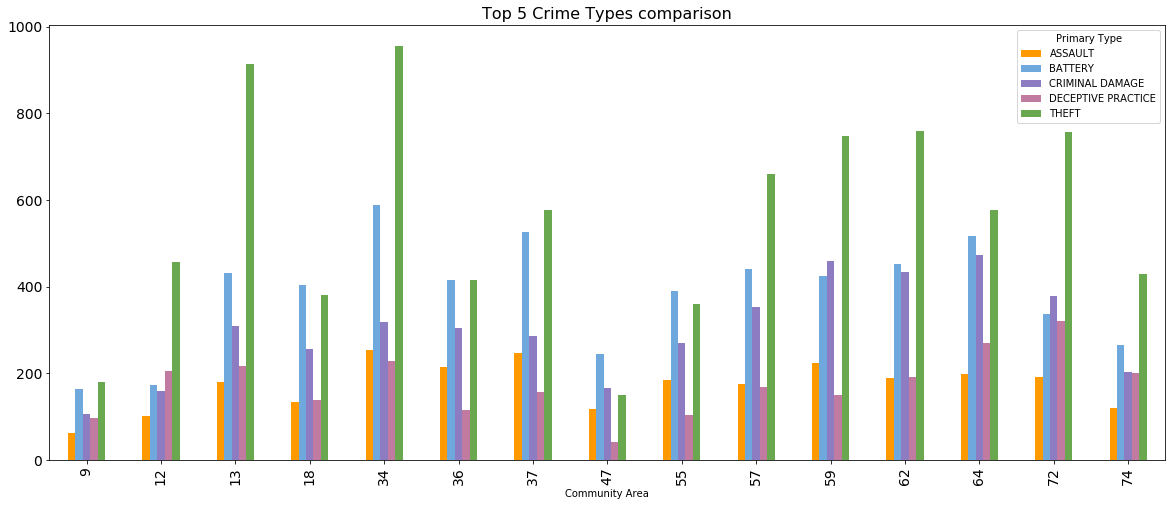

In [23]:
ax=df_pivot.plot(kind = 'bar',figsize=(20,8),
                color=['#FF9900','#6FA8DC','#8E7CC3','#C27BA0','#6AA84F'],
               legend =True,fontsize=14,title='Top 5 crimes data')
ax.set_title('Top 5 Crime Types comparison',fontdict={'fontsize':16})

### Web Scraping to get names of community areas and their neighborhoods

In [24]:
from bs4 import BeautifulSoup #Library for webpage scraping
import urllib.request # Library for opening URLs

In [25]:
#url = "https://en.wikipedia.org/wiki/Community_areas_in_Chicago"
url = "https://en.wikipedia.org/w/index.php?title=Community_areas_in_Chicago&diff=952586757&oldid=952586127"
pagedata = urllib.request.urlopen(url)

In [26]:
soup = BeautifulSoup(pagedata,'lxml')

In [27]:
table_data = soup.findAll('table',class_="wikitable")


In [28]:
t_rows = []
t_tables = []
for table in table_data:
    t_tables.append(table.findAll('tr'))

for i in range(len(t_tables)):
    for j in range(1, len(t_tables[i])):
        t_rows.append(t_tables[i][j].findAll('td'))

col1=[]
col2=[]
col3=[]

for i in range(len(t_rows)):
    col1.append(t_rows[i][0].findAll(text=True))
    col2.append(t_rows[i][1].findAll(text=True))
    col3.append(t_rows[i][2].findAll(text=True))

for i in range(len(col3)):
    col1[i]=' '.join(map(str,col1[i]))
    col1[i]=col1[i].strip()
    col2[i]=' '.join(map(str,col2[i]))
    col2[i]=col2[i].strip()
    col3[i]=' '.join(map(str,col3[i]))
    col3[i]=col3[i].strip()

 

In [29]:
df_community = pd.DataFrame({'Community code':col1,'Community Area':col2,'Neighborhoods':col3})

In [30]:
df_community.head()

,Community code,Community Area,Neighborhoods
0,08,Near North Side,Cabrini–Green \n The Gold Coast \n Goose Islan...
1,32,Loop,Loop \n New Eastside \n South Loop \n West Loo...
2,33,Near South Side,Dearborn Park \n Printer's Row \n South Loop \...
3,05,North Center,Horner Park \n Roscoe Village
4,06,Lake View,Boystown \n Lake View East \n Graceland West \...


### Clean the data as below

In [31]:
df_community.replace(to_replace = {'Neighborhoods': '\\n'},value = ',',regex= True,inplace=True)

In [32]:
df_community.head()

,Community code,Community Area,Neighborhoods
0,08,Near North Side,"Cabrini–Green , The Gold Coast , Goose Island ..."
1,32,Loop,"Loop , New Eastside , South Loop , West Loop Gate"
2,33,Near South Side,"Dearborn Park , Printer's Row , South Loop , P..."
3,05,North Center,"Horner Park , Roscoe Village"
4,06,Lake View,"Boystown , Lake View East , Graceland West , S..."


### Check if all the neighborhood values are populated.

In [33]:
#Identify the rows where Neighborhoods is blank.
df_community[df_community['Neighborhoods']=='']

,Community code,Community Area,Neighborhoods
26,23,Humboldt Park,
29,26,West Garfield Park,
37,36,Oakland,
38,37,Fuller Park,
41,40,Washington Park,
45,60,Bridgeport,
48,57,Archer Heights,
49,58,Brighton Park,
50,59,McKinley Park,
52,62,West Elsdon,


### If neighborhood is blank, assign community area name as neighborhood.

In [34]:
#If neighborhoods is blank, assign value of community area name to neighborhoods.
for index,row in df_community.iterrows():
    if (row['Neighborhoods'] == ''):
        row['Neighborhoods']=row['Community Area']
#df_community

In [35]:
#Verify that there are no rows with blank neighborhoods value
df_community[df_community['Neighborhoods']=='']

,Community code,Community Area,Neighborhoods


In [36]:
df_community['Community code']=df_community['Community code'].astype(int)

### Get location coordinates for Chicago city

In [37]:
from geopy.geocoders import Nominatim 
address = "Chicago,IL"

geolocator = Nominatim(user_agent="Chicago_explorer")
location = geolocator.geocode(address)
latitude_chicago = location.latitude
longitude_chicago = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude_chicago, longitude_chicago))

The geograpical coordinate of Chicago,IL are 41.8755616, -87.6244212.


### Get the neighbohoods name for safer community areas.

In [38]:
#get rows from df_community for safer_comm_codes and put in new dataframe
df_safer_comm= df_community[df_community['Community code'].isin(safer_comm_codes)]
df_safer_comm.reset_index(drop=True,inplace= True)
df_safer_comm

,Community code,Community Area,Neighborhoods
0,9,Edison Park,Edison Park
1,12,Forest Glen,"Edgebrook , Old Edgebrook , South Edgebrook , ..."
2,13,North Park,"Brynford Park , Hollywood Park , River's Edge ..."
3,18,Montclare,Montclare
4,34,Armour Square,"Chinatown , Wentworth Gardens"
5,36,Oakland,Oakland
6,37,Fuller Park,Fuller Park
7,57,Archer Heights,Archer Heights
8,59,McKinley Park,McKinley Park
9,62,West Elsdon,West Elsdon


### Get coordinates for each community area

In [120]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="Chicago_explorer")

Latitude_list = []
Longitude_list = []
for index,row in df_safer_comm.iterrows():
   
    addr = row['Community Area']+' Chicago,IL'
    try:
        loc = geolocator.geocode(addr)
        latitude = loc.latitude
        longitude = loc.longitude
    except:
        print("Location not found for {}".format(addr))
        latitude = ' '
        longitude = ' '
               
    Latitude_list.append(latitude)
    Longitude_list.append(longitude)
    
print(Latitude_list)
print(Longitude_list)


Location not found for Edison Park Chicago,IL
Location not found for Forest Glen Chicago,IL
Location not found for North Park Chicago,IL
[' ', ' ', ' ', 41.92774435, 41.8400333, 41.8236535, 41.8180891, 41.8114215, 41.8316997, 41.7939217, 41.780588, 41.7300345, 41.6536462, 41.7181532, 41.6980891]
[' ', ' ', ' ', -87.798456869467, -87.633107, -87.6082424, -87.6325508, -87.7261651, -87.6736638, -87.7244978, -87.7733881, -87.596714, -87.5469885, -87.6717674, -87.7086616]


Just FYI: Geopy.geocoder is bit unreliable, I ran it multiple times to get coordinates for all locations and stored the same in a list. But I did get coordinates for all locations using it.

In [39]:
#Latitude_list=[42.0057335, 41.991751550000004, 41.98495475, 41.92774435, 41.8400333, 41.8236535, 41.8180891, 41.8114215, 41.8316997, 41.7939217, 41.780588, 41.7300345, 41.6536462, 41.7181532, 41.6980891]
#Longitude_list=[-87.81401633833357, -87.75167396842738, -87.72293282470297, -87.798456869467, -87.633107, -87.6082424, -87.6325508, -87.7261651, -87.6736638, -87.7244978, -87.7733881, -87.596714, -87.5469885, -87.6717674, -87.7086616]
df_safer_comm['Latitude'] = Latitude_list
df_safer_comm['Longitude'] = Longitude_list
#df_safer_comm

/Users/yogeshdhome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yogeshdhome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
df_safer_comm

,Community code,Community Area,Neighborhoods,Latitude,Longitude
0,9,Edison Park,Edison Park,42.005733,-87.814016
1,12,Forest Glen,"Edgebrook , Old Edgebrook , South Edgebrook , ...",41.991752,-87.751674
2,13,North Park,"Brynford Park , Hollywood Park , River's Edge ...",41.984955,-87.722933
3,18,Montclare,Montclare,41.927744,-87.798457
4,34,Armour Square,"Chinatown , Wentworth Gardens",41.840033,-87.633107
5,36,Oakland,Oakland,41.823653,-87.608242
6,37,Fuller Park,Fuller Park,41.818089,-87.632551
7,57,Archer Heights,Archer Heights,41.811422,-87.726165
8,59,McKinley Park,McKinley Park,41.831700,-87.673664
9,62,West Elsdon,West Elsdon,41.793922,-87.724498


### Using above dataframe, create Chicago city map with community areas plotted over it.

In [41]:
#Create map
import folium
Chicago_map=folium.Map(location=[latitude_chicago,longitude_chicago])

for lat,long,comm_area in zip(df_safer_comm['Latitude'],df_safer_comm['Longitude'],df_safer_comm['Community Area']):
    label = '{}'.format(comm_area)
    label = folium.Popup(label,parse_html = True)
    folium.CircleMarker(
        location=[lat,long],
        radius = 5,
        popup = label,
        color = 'blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Chicago_map) 

Chicago_map  

<p><b> Use Foursquare app credentials for further analysis</b></p>

In [42]:
CLIENT_ID = 'WTYTUTTJ2DPSFHAS4KY03TSYRZZS0JFJ1X0ST42NJUEGJWT4' # your Foursquare ID
CLIENT_SECRET = 'W4FPORRDHKEZI3F0CJVOEMIIFARGUU4XZCO3OUX3KSFQNNBU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: WTYTUTTJ2DPSFHAS4KY03TSYRZZS0JFJ1X0ST42NJUEGJWT4
CLIENT_SECRET:W4FPORRDHKEZI3F0CJVOEMIIFARGUU4XZCO3OUX3KSFQNNBU


<b>Get dataset for all the nearby venues for all neighborhoods of df_safer_neighborhoods</b>

In [43]:
#function 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

LIMIT = 100
Radius = 5000
def get_Nearby_Venues(comm_code,comm_area,neighborhood,comm_lat,comm_long,radius=Radius):
    
    venues_list=[]
    for cc,ca,nhood,comm_lat,comm_long in zip(comm_code,comm_area,neighborhood,comm_lat,comm_long):
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            comm_lat, 
            comm_long, 
            radius, 
            LIMIT)

        #send GET request and examine results
        results = requests.get(url).json()["response"]['groups'][0]['items']
        

        for r in results:
            venues_list.append(
                [cc,
                ca,
                nhood,
                comm_lat,
                comm_long,
                r['venue']['name'],
                r['venue']['location']['lat'],
                r['venue']['location']['lng'],
                r['venue']['categories'][0]['name']])
    
    #print(venues_list[0])
    
    Neighborhood_venues = pd.DataFrame() #Create empty dataframe object
    
    #create blank lists for each column data
    list_cc=[]
    list_ca=[]
    list_nhood=[]
    list_comm_lat=[]
    list_comm_lng=[]
    list_venue=[]
    list_venue_lat=[]
    list_venue_lng=[]
    list_category=[]
    
    for i in range(len(venues_list)):
        
        list_cc.append(venues_list[i][0])
        list_ca.append(venues_list[i][1])
        list_nhood.append(venues_list[i][2])
        list_comm_lat.append(venues_list[i][3])
        list_comm_lng.append(venues_list[i][4])
        list_venue.append(venues_list[i][5])
        list_venue_lat.append(venues_list[i][6])
        list_venue_lng.append(venues_list[i][7])
        list_category.append(venues_list[i][8])
    
    Neighborhood_venues['Community Code'] = list_cc
    Neighborhood_venues['Community Area'] = list_ca
    Neighborhood_venues['Neighborhood'] = list_nhood
    Neighborhood_venues['Latitude'] = list_comm_lat
    Neighborhood_venues['Longitude'] = list_comm_lng
    Neighborhood_venues['Venue name'] = list_venue
    Neighborhood_venues['Venue Latitude'] = list_venue_lat
    Neighborhood_venues['Venue Longitude'] = list_venue_lng
    Neighborhood_venues['Venue Category'] = list_category
    
    return(Neighborhood_venues)

In [44]:
Neighborhood_venues = get_Nearby_Venues(comm_code=df_safer_comm['Community code'],
                  comm_area=df_safer_comm['Community Area'],
                  neighborhood=df_safer_comm['Neighborhoods'],
                  comm_lat=df_safer_comm['Latitude'],
                  comm_long=df_safer_comm['Longitude'])



In [55]:
#Neighborhood_venues[Neighborhood_venues['Community Code']==9]
Neighborhood_venues.head()

,Community Code,Community Area,Neighborhood,Latitude,Longitude,Venue name,Venue Latitude,Venue Longitude,Venue Category
0,9,Edison Park,Edison Park,42.005733,-87.814016,Tony's Italian Deli and Subs,42.002882,-87.816443,Deli / Bodega
1,9,Edison Park,Edison Park,42.005733,-87.814016,Zia's Trattoria,42.002697,-87.816013,Italian Restaurant
2,9,Edison Park,Edison Park,42.005733,-87.814016,Dairy Queen,41.997048,-87.821616,Ice Cream Shop
3,9,Edison Park,Edison Park,42.005733,-87.814016,Brooks (Oscar) Park,42.010524,-87.810235,Park
4,9,Edison Park,Edison Park,42.005733,-87.814016,Nick's Drive-In,42.012274,-87.807024,Greek Restaurant


In [45]:
print('There are {} uniques categories.'.format(len(Neighborhood_venues['Venue Category'].unique())))

There are 195 uniques categories.


In [46]:
Neighborhood_venues_onehot = pd.get_dummies(data = Neighborhood_venues['Venue Category'],prefix="",prefix_sep = "")


In [47]:
cols = Neighborhood_venues_onehot.columns
print(cols)

Index(['ATM', 'African Restaurant', 'Airport Service', 'American Restaurant',
       'Amphitheater', 'Aquarium', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Arts & Entertainment',
       ...
       'Trail', 'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Waterfront',
       'Whisky Bar', 'Wings Joint', 'Yoga Studio'],
      dtype='object', length=195)


In [48]:
#Add column Community Area at start
Neighborhood_venues_onehot.insert(0,'Community Area',Neighborhood_venues['Community Area'])
Neighborhood_venues_onehot.head()

,Community Area,ATM,African Restaurant,Airport Service,American Restaurant,Amphitheater,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wings Joint,Yoga Studio
0,Edison Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Edison Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Edison Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Edison Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Edison Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p><b> Mean of frequency of occurence for each category group by neighborhood</b></p>

In [49]:
Neighborhood_venues_grouped = Neighborhood_venues_onehot.groupby('Community Area').mean().reset_index()

In [50]:
Neighborhood_venues_grouped.head()

,Community Area,ATM,African Restaurant,Airport Service,American Restaurant,Amphitheater,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wings Joint,Yoga Studio
0,Archer Heights,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.01,0.00
1,Armour Square,0.00,0.01,0.00,0.00,0.01,0.04,0.01,0.01,0.01,...,0.01,0.00,0.00,0.0,0.0,0.01,0.01,0.0,0.00,0.04
2,Beverly,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,...,0.01,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00
3,Burnside,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.01,0.0,0.0,0.00,0.00,0.0,0.02,0.00
4,Clearing,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.0,0.01,0.00,0.0,0.00,0.00


### Get top 10 most common venues in each community area

In [51]:
num_top_venues =10

for area in Neighborhood_venues_grouped['Community Area']:
    print("----"+area+"----")
    #get transpose using T
    temp = Neighborhood_venues_grouped[Neighborhood_venues_grouped['Community Area']==area].T.reset_index()
    temp=temp.iloc[1:] #1st row will be Neighborhood and Neighborhood value, so ignore 1st row
    temp.columns = ['venue category','frequency']
    temp['frequency']=temp['frequency'].astype(float)
    temp = temp.round({'frequency': 2})
    print(temp.sort_values('frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Archer Heights----
       venue category  frequency
0  Mexican Restaurant       0.14
1         Pizza Place       0.07
2          Taco Place       0.06
3         Coffee Shop       0.04
4                Park       0.04
5                 Bar       0.04
6        Liquor Store       0.03
7       Hot Dog Joint       0.03
8  Seafood Restaurant       0.03
9            Pharmacy       0.03


----Armour Square----
       venue category  frequency
0                Park       0.08
1       Grocery Store       0.06
2         Yoga Studio       0.04
3               Beach       0.04
4            Aquarium       0.04
5         Coffee Shop       0.04
6  Mexican Restaurant       0.03
7               Hotel       0.03
8       Hot Dog Joint       0.02
9      History Museum       0.02


----Beverly----
         venue category  frequency
0              Pharmacy       0.06
1    Italian Restaurant       0.05
2  Fast Food Restaurant       0.04
3        Breakfast Spot       0.04
4        Sandwich Place       0.04

### Create a dataframe showing 10 most popular venue categories against each community area

In [52]:
import numpy as np
num_top = 10
#create column list

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community Area']
for ind in np.arange(num_top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

most_pop_categories = pd.DataFrame(columns = columns)
most_pop_categories['Community Area']=Neighborhood_venues_grouped['Community Area']



In [53]:
for ind in np.arange(Neighborhood_venues_grouped.shape[0]):
    
    row_data = Neighborhood_venues_grouped.iloc[ind,1:]
    row_data_sorted = row_data.sort_values(ascending = False)
    most_pop_categories.iloc[ind,1:]=row_data_sorted.index.values[0:num_top]

In [54]:
most_pop_categories

,Community Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Archer Heights,Mexican Restaurant,Pizza Place,Taco Place,Bar,Park,Coffee Shop,American Restaurant,Liquor Store,Hot Dog Joint,Pharmacy
1,Armour Square,Park,Grocery Store,Yoga Studio,Coffee Shop,Aquarium,Beach,Hotel,Mexican Restaurant,Football Stadium,Pub
2,Beverly,Pharmacy,Italian Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Breakfast Spot,Grocery Store,Burger Joint,Hot Dog Joint,Park
3,Burnside,Lounge,Seafood Restaurant,Fast Food Restaurant,Pharmacy,Bar,Mexican Restaurant,Donut Shop,Caribbean Restaurant,Park,Southern / Soul Food Restaurant
4,Clearing,Mexican Restaurant,Pizza Place,American Restaurant,Donut Shop,Sandwich Place,Pharmacy,Breakfast Spot,Fast Food Restaurant,Taco Place,Bakery
5,Edison Park,Grocery Store,Pizza Place,Italian Restaurant,Pharmacy,Dessert Shop,Bakery,Coffee Shop,Deli / Bodega,Sandwich Place,Hot Dog Joint
6,Forest Glen,Park,Grocery Store,Pizza Place,Coffee Shop,American Restaurant,Ice Cream Shop,Vietnamese Restaurant,Mexican Restaurant,Filipino Restaurant,Bar
7,Fuller Park,Park,Grocery Store,Coffee Shop,Art Gallery,Pizza Place,Bakery,History Museum,Breakfast Spot,Beach,Café
8,Hegewisch,Discount Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Pharmacy,Bar,Grocery Store,American Restaurant,Seafood Restaurant,Pizza Place
9,McKinley Park,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Bar,Park,Diner,Hot Dog Joint,Italian Restaurant,Taco Place


### Clustering community areas using K-means algorithm

In [55]:
from sklearn.cluster import KMeans
#set number of clusters
kclusters = 3

comm_area_cluster = Neighborhood_venues_grouped.drop('Community Area',1)

#kmeans clustering
kmeans = KMeans(n_clusters=kclusters,random_state=0)
kmeans.fit(comm_area_cluster)

#kmeans labels generated for each row 
kmeans.labels_

array([1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1], dtype=int32)

In [56]:
#Create a dataframe to show cluster lables as well as top 10 most popular venue categories for that community area
try:
    most_pop_categories.insert(0,'Cluster labels',kmeans.labels_)
except:
    most_pop_categories.drop('Cluster labels',1,inplace=True)
    most_pop_categories.insert(0,'Cluster labels',kmeans.labels_)
    
df_cluster = df_safer_comm
df_cluster = df_cluster.join(most_pop_categories.set_index('Community Area'),on='Community Area')


In [57]:
df_cluster

,Community code,Community Area,Neighborhoods,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9,Edison Park,Edison Park,42.005733,-87.814016,2,Grocery Store,Pizza Place,Italian Restaurant,Pharmacy,Dessert Shop,Bakery,Coffee Shop,Deli / Bodega,Sandwich Place,Hot Dog Joint
1,12,Forest Glen,"Edgebrook , Old Edgebrook , South Edgebrook , ...",41.991752,-87.751674,0,Park,Grocery Store,Pizza Place,Coffee Shop,American Restaurant,Ice Cream Shop,Vietnamese Restaurant,Mexican Restaurant,Filipino Restaurant,Bar
2,13,North Park,"Brynford Park , Hollywood Park , River's Edge ...",41.984955,-87.722933,0,Park,Coffee Shop,Grocery Store,Brewery,Ice Cream Shop,Bakery,Gym,American Restaurant,Pizza Place,Middle Eastern Restaurant
3,18,Montclare,Montclare,41.927744,-87.798457,2,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Italian Restaurant,Coffee Shop,Liquor Store,Park,Pizza Place,Pharmacy,Ice Cream Shop
4,34,Armour Square,"Chinatown , Wentworth Gardens",41.840033,-87.633107,0,Park,Grocery Store,Yoga Studio,Coffee Shop,Aquarium,Beach,Hotel,Mexican Restaurant,Football Stadium,Pub
5,36,Oakland,Oakland,41.823653,-87.608242,0,Park,Beach,Café,Coffee Shop,Grocery Store,Pizza Place,Art Gallery,Breakfast Spot,History Museum,Bookstore
6,37,Fuller Park,Fuller Park,41.818089,-87.632551,0,Park,Grocery Store,Coffee Shop,Art Gallery,Pizza Place,Bakery,History Museum,Breakfast Spot,Beach,Café
7,57,Archer Heights,Archer Heights,41.811422,-87.726165,1,Mexican Restaurant,Pizza Place,Taco Place,Bar,Park,Coffee Shop,American Restaurant,Liquor Store,Hot Dog Joint,Pharmacy
8,59,McKinley Park,McKinley Park,41.831700,-87.673664,1,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Bar,Park,Diner,Hot Dog Joint,Italian Restaurant,Taco Place
9,62,West Elsdon,West Elsdon,41.793922,-87.724498,1,Mexican Restaurant,Pizza Place,Taco Place,Park,Pharmacy,Coffee Shop,Sandwich Place,American Restaurant,Donut Shop,Discount Store


In [58]:
#Visualizing clusters

cluster_map=folium.Map(location=[latitude_chicago,longitude_chicago],zoom_start=10) 

rainbow=['#CD5C5C','#FF00FF','#32CD32']

# add markers to the map
markers_colors = []
for lat, lon, ca, cluster in zip(df_cluster['Latitude'], df_cluster['Longitude'], df_cluster['Community Area'], df_cluster['Cluster labels']):
    label = folium.Popup(str(ca) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(cluster_map)
       
cluster_map

### Cluster 1 : Cluster label 0

In [59]:
df_cluster.loc[df_cluster['Cluster labels'] == 0, df_cluster.columns[[1] + list(range(5, df_cluster.shape[1]))]]

,Community Area,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Forest Glen,0,Park,Grocery Store,Pizza Place,Coffee Shop,American Restaurant,Ice Cream Shop,Vietnamese Restaurant,Mexican Restaurant,Filipino Restaurant,Bar
2,North Park,0,Park,Coffee Shop,Grocery Store,Brewery,Ice Cream Shop,Bakery,Gym,American Restaurant,Pizza Place,Middle Eastern Restaurant
4,Armour Square,0,Park,Grocery Store,Yoga Studio,Coffee Shop,Aquarium,Beach,Hotel,Mexican Restaurant,Football Stadium,Pub
5,Oakland,0,Park,Beach,Café,Coffee Shop,Grocery Store,Pizza Place,Art Gallery,Breakfast Spot,History Museum,Bookstore
6,Fuller Park,0,Park,Grocery Store,Coffee Shop,Art Gallery,Pizza Place,Bakery,History Museum,Breakfast Spot,Beach,Café


As we can see, 1st most common venue for community areas under cluster 0 is Park.
Then we have grocery store, pizza place and coffee shops in each area. 
Three of the five areas have beach while two of the five have Breakfast spots.
Either Yoga studio or gym or park are present in each area if someone is interested in regular fitness activities. 
For people interested in Arts and History, there are Arts galleries and History museums.


### Cluster 2 : Cluster label 1

In [60]:
df_cluster.loc[df_cluster['Cluster labels'] == 1, df_cluster.columns[[1] + list(range(5, df_cluster.shape[1]))]]

,Community Area,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Archer Heights,1,Mexican Restaurant,Pizza Place,Taco Place,Bar,Park,Coffee Shop,American Restaurant,Liquor Store,Hot Dog Joint,Pharmacy
8,McKinley Park,1,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Bar,Park,Diner,Hot Dog Joint,Italian Restaurant,Taco Place
9,West Elsdon,1,Mexican Restaurant,Pizza Place,Taco Place,Park,Pharmacy,Coffee Shop,Sandwich Place,American Restaurant,Donut Shop,Discount Store
10,Clearing,1,Mexican Restaurant,Pizza Place,American Restaurant,Donut Shop,Sandwich Place,Pharmacy,Breakfast Spot,Fast Food Restaurant,Taco Place,Bakery


As one can clearly observe that cluster 1 areas have Mexican restaurants, Pizza places and taco places as their most common venues.

### Cluster 3 : Cluster label 2

In [61]:
df_cluster.loc[df_cluster['Cluster labels'] == 2, df_cluster.columns[[1] + list(range(5, df_cluster.shape[1]))]]

,Community Area,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Edison Park,2,Grocery Store,Pizza Place,Italian Restaurant,Pharmacy,Dessert Shop,Bakery,Coffee Shop,Deli / Bodega,Sandwich Place,Hot Dog Joint
3,Montclare,2,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Italian Restaurant,Coffee Shop,Liquor Store,Park,Pizza Place,Pharmacy,Ice Cream Shop
11,Burnside,2,Lounge,Seafood Restaurant,Fast Food Restaurant,Pharmacy,Bar,Mexican Restaurant,Donut Shop,Caribbean Restaurant,Park,Southern / Soul Food Restaurant
12,Hegewisch,2,Discount Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Pharmacy,Bar,Grocery Store,American Restaurant,Seafood Restaurant,Pizza Place
13,Beverly,2,Pharmacy,Italian Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Breakfast Spot,Grocery Store,Burger Joint,Hot Dog Joint,Park
14,Mount Greenwood,2,Pizza Place,Fast Food Restaurant,Italian Restaurant,Grocery Store,Donut Shop,Bar,Pharmacy,Ice Cream Shop,Burger Joint,Park


Cluster 3 has Pharmacy and grocery store as most common venues. Apart from these two, we have Fast Food Restaurant, Italian Restaurant and Mexican restaurant as another most common venue categories.

After analyzing the clusters, we can conclude that areas in cluster 1 i.e. with cluster label = 0 have good combination of venues such as restaurants, grocery stores, beach, park, fitness activity centers(Yoga Studio and Gym), and it also has Art galleries and museum. So it covers most of the interests one might have. 